In [1]:
# Load library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

/Users/tina/anaconda3/envs/gl-env/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Load data
df = pd.read_csv("last_2_years_restaurant_reviews.csv")
df.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-02-14,0,VETXTwMw6qxzOVDlXfe6Tg,5,went for dinner tonight. Amazing my husband ha...,0,ymlnR8UeFvB4FZL56tCZsA
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-12-04,0,S8-8uZ7fa5YbjnEtaW15ng,5,This was an amazing dinning experience! ORDER ...,0,9pSSL6X6lFpY3FCRLEH3og
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2016-09-13,0,N1Z93BthdJ7FT2p5S22jIA,3,Went for a nice anniversary dinner. Researched...,0,CEtidlXNyQzgJSdF1ubPFw
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-05-20,0,Pnkrj90xfykhHyo4BSFRsw,5,ABSOLUTE MUST IN VEGAS! Loved everything my bo...,0,cZVQGCZ_fHtTdfiyGVJPdg
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-12-30,0,Oeh7e6U2xaDQI9L9i4x_Gw,2,I had high hopes for Delmonico's Steakhouse in...,0,li2cBZl60vgqihDJJG7jeA


## Clean data and get rating data

### Select relevant columns in the original dataframe

In [3]:
# Get business_id, user_id, stars for recommender
df_stars = df[['business_id', 'user_id', 'stars']]

In [4]:
# Stars distribution
df_stars['stars'].value_counts()

5    180828
4     71621
1     47653
3     37344
2     28104
Name: stars, dtype: int64

In [5]:
# The number of unique business_id
df_stars['business_id'].nunique() # the number of unique elements

4550

In [6]:
# The number of unique user_id
df_stars['user_id'].nunique()

176960

In [7]:
# User comments counts
df_user_counts = df_stars['user_id'].value_counts()
df_user_counts.head()

bLbSNkLggFnqwNNzzq-Ijw    333
JaqcCU3nxReTW2cBLHounA    213
YE54kKTuqJJPNYWIKIpOEQ    185
I-4KVZ9lqHhk8469X9FvhA    176
U4INQZOPSUaj8hMjLlZ3KA    148
Name: user_id, dtype: int64

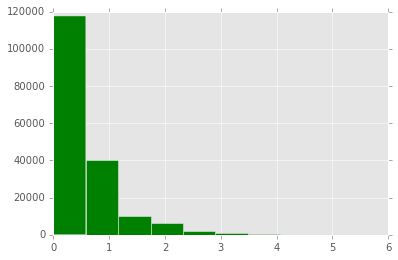

In [8]:
# display log histogram
# df_user_counts.hist()
df_user_counts.apply(np.log).hist(color='green', label= 'Users count of reveiws')
plt.show()

#### There are many users that haven't given many reviews, exclude these users from the item -item similarity recommender.

In [9]:
# How many users only comments once
df_user_counts[df_user_counts == 1].sum()

117664

In [10]:
# How many users comment over 5 times
df_users = df_user_counts[df_user_counts > 5]

In [11]:
# Count users comment over 5 times as active user
df_users.count()

9396

In [12]:
# Sum of all comments
df_users.sum()

113051

In [13]:
# Display active user id
df_users.index

Index([u'bLbSNkLggFnqwNNzzq-Ijw', u'JaqcCU3nxReTW2cBLHounA',
       u'YE54kKTuqJJPNYWIKIpOEQ', u'I-4KVZ9lqHhk8469X9FvhA',
       u'U4INQZOPSUaj8hMjLlZ3KA', u'keBv05MsMFBd0Hu98vXThQ',
       u'OXSJCjKtvZPf-YPDCXcWZg', u'lQBZo8_mm80dbwI5bo5c_w',
       u'PKEzKWv_FktMm2mGPjwd0Q', u'JQIZhoQB-Tg9hdBEj90m4g',
       ...
       u'cKTwpQOnnu2KjfINPRhRTw', u'1jMUzrfaN1Bajf7m-gXbUg',
       u'fr1XVKLZB0JbkijfzxMoXg', u'HMrdhoMQoAkh_5rrmFvSfw',
       u'2dLz_y1_rUHj9O3_lJfT9w', u'sWpQ5sNssxFdWIU9iuwUCw',
       u'UiDCy0-fdHG6IwHg9mn8Dw', u'67HwuY1mtttvvnqn9tHU0Q',
       u'1Rc0tO2rDkKVuI93piE_1A', u'7PHHxsjyk7I7oM6ENxwZZQ'],
      dtype='object', length=9396)

In [14]:
df_stars.head()

,business_id,user_id,stars
0,--9e1ONYQuAa-CB_Rrw7Tw,ymlnR8UeFvB4FZL56tCZsA,5
1,--9e1ONYQuAa-CB_Rrw7Tw,9pSSL6X6lFpY3FCRLEH3og,5
2,--9e1ONYQuAa-CB_Rrw7Tw,CEtidlXNyQzgJSdF1ubPFw,3
3,--9e1ONYQuAa-CB_Rrw7Tw,cZVQGCZ_fHtTdfiyGVJPdg,5
4,--9e1ONYQuAa-CB_Rrw7Tw,li2cBZl60vgqihDJJG7jeA,2


In [15]:
df_stars.set_index('user_id').head()

,business_id,stars
user_id,,
ymlnR8UeFvB4FZL56tCZsA,--9e1ONYQuAa-CB_Rrw7Tw,5
9pSSL6X6lFpY3FCRLEH3og,--9e1ONYQuAa-CB_Rrw7Tw,5
CEtidlXNyQzgJSdF1ubPFw,--9e1ONYQuAa-CB_Rrw7Tw,3
cZVQGCZ_fHtTdfiyGVJPdg,--9e1ONYQuAa-CB_Rrw7Tw,5
li2cBZl60vgqihDJJG7jeA,--9e1ONYQuAa-CB_Rrw7Tw,2


In [16]:
df_stars.set_index('user_id').ix[df_users.index].head() # sorting with users

,business_id,stars
user_id,,
bLbSNkLggFnqwNNzzq-Ijw,-CQokjildrY7UZezXCdEBw,5
bLbSNkLggFnqwNNzzq-Ijw,-WLrZPzjKfrftLWaCi1QZQ,3
bLbSNkLggFnqwNNzzq-Ijw,-a43zqioXNOjx_QejRS9FA,4
bLbSNkLggFnqwNNzzq-Ijw,-pG5srxtnRkd1bdIYn78xA,4
bLbSNkLggFnqwNNzzq-Ijw,-qYuPncpK8elgD-6Qx3v7A,3


In [17]:
# Reorder dataframe
df_stars_cleaned = df_stars.set_index('user_id').ix[df_users.index].reset_index()
df_stars_cleaned.head()

,user_id,business_id,stars
0,bLbSNkLggFnqwNNzzq-Ijw,-CQokjildrY7UZezXCdEBw,5
1,bLbSNkLggFnqwNNzzq-Ijw,-WLrZPzjKfrftLWaCi1QZQ,3
2,bLbSNkLggFnqwNNzzq-Ijw,-a43zqioXNOjx_QejRS9FA,4
3,bLbSNkLggFnqwNNzzq-Ijw,-pG5srxtnRkd1bdIYn78xA,4
4,bLbSNkLggFnqwNNzzq-Ijw,-qYuPncpK8elgD-6Qx3v7A,3


## Create utility matrix from records

In [18]:
# convert to document, word like matrix
df_utility = pd.pivot_table(data = df_stars_cleaned,
                           values = 'stars',#fill with stars
                           index = 'user_id',#rows
                           columns = 'business_id',#columns
                           fill_value = 0)#fill missings

In [19]:
df_utility.head()

business_id,--9e1ONYQuAa-CB_Rrw7Tw,-1m9o3vGRA8IBPNvNqKLmA,-3zffZUHoY8bQjGfPSoBKQ,-8R_-EkGpUhBk55K9Dd4mg,-9YyInW1wapzdNZrhQJ9dg,-AD5PiuJHgdUcAK-Vxao2A,-ADtl9bLp8wNqYX1k3KuxA,-Bf8BQ3yMk8U2f45r2DRKw,-BmqghX1sv7sgsxOIS2yAg,-Bv-HHUs8aHzDrdWcZHn8w,...,zmltWmTpoBt5sCU-5Kzj-Q,znWHLW1pt19HzW1VY6KfCA,zp-K5s3pGTWuuaVBWo6WZA,zpoZ6WyQUYff18-z4ZU1mA,zr42_UsWfaIF-rcp37OpwA,zsQk990PubOHjr1YcLkQFw,zttcrQP4MxNS5X5itzStXg,zuwba6QEBIDZT0tJZmNhdQ,zwNC-Ow4eIMan2__bS9-rg,zx_j6OuuHHa2afVoAZuLpA
user_id,,,,,,,,,,,,,,,,,,,,,
--ZNfWKj1VyVElRx6-g1fg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
-0Hf2jiBo7hJdxYW0Y6PKQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-0OyT3le0GqdyvRLLfB7MQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-16aKjco1c0RJ7c4U-q_Kw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-2gOxVWcnBr5DclrrsWXCA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Get the list of user id by checking out the index of the utility matrix
user_id_list = df_utility.index
user_id_list.shape

(9396,)

## Recommendation System with Graphlab

In [21]:
import graphlab

### Item -Item similarity recommender

In [22]:
sf_stars = graphlab.SFrame(df_stars)
sf_stars

This non-commercial license of GraphLab Create for academic use is assigned to sguo1@alliant.edu and will expire on October 19, 2019.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1539981224.log


business_id,user_id,stars
--9e1ONYQuAa-CB_Rrw7Tw,ymlnR8UeFvB4FZL56tCZsA,5
--9e1ONYQuAa-CB_Rrw7Tw,9pSSL6X6lFpY3FCRLEH3og,5
--9e1ONYQuAa-CB_Rrw7Tw,CEtidlXNyQzgJSdF1ubPFw,3
--9e1ONYQuAa-CB_Rrw7Tw,cZVQGCZ_fHtTdfiyGVJPdg,5
--9e1ONYQuAa-CB_Rrw7Tw,li2cBZl60vgqihDJJG7jeA,2
--9e1ONYQuAa-CB_Rrw7Tw,zGipc5uOJrejX6KkUsSNpA,4
--9e1ONYQuAa-CB_Rrw7Tw,Lgmfl_A0cy72dwZfbuh9Tg,4
--9e1ONYQuAa-CB_Rrw7Tw,nGw_csaHeNdtb3IpSmtuGA,2
--9e1ONYQuAa-CB_Rrw7Tw,KC8H7qTZVPIEnanw9fG43g,5
--9e1ONYQuAa-CB_Rrw7Tw,P1O81PTvXaR9kYKaP3_qwg,5


In [24]:
# item-item recommender
item_item_rec = graphlab.recommender.item_similarity_recommender.create(sf_stars,
                                                                       user_id='user_id',
                                                                       item_id='business_id',
                                                                       target='stars')

Recsys training: model = item_similarity

Preparing data set.

Data has 365550 observations with 176960 users and 4550 items.

Data prepared in: 0.464461s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 5.55ms                         | 5.5        |

| 41.991ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 156.614ms                           | 0                | 0               |

| 370.695ms                           | 100              | 4550            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.41609s

In [26]:
item_item_rec_result = item_item_rec.recommend(k=3, verbose=False)
item_item_rec_result

user_id,business_id,score,rank
ymlnR8UeFvB4FZL56tCZsA,J4CATH00YZrq8Bne2S4_cw,0.0204778313637,1
ymlnR8UeFvB4FZL56tCZsA,rcaPajgKOJC2vo_l3xa42A,0.0176795721054,2
ymlnR8UeFvB4FZL56tCZsA,qFAw6wHMMcr4ctF-ZdGhEA,0.0146138072014,3
9pSSL6X6lFpY3FCRLEH3og,dubu2kN3Y9EB4uYGFWa0MQ,0.0155709385872,1
9pSSL6X6lFpY3FCRLEH3og,J4CATH00YZrq8Bne2S4_cw,0.0102389156818,2
9pSSL6X6lFpY3FCRLEH3og,SeNOJ2zYHziptxLuiRINLg,0.0100431740284,3
CEtidlXNyQzgJSdF1ubPFw,QJatAcxYgK1Zp9BRZMAx7g,0.00976059834162,1
CEtidlXNyQzgJSdF1ubPFw,77h11eWv6HKJAgojLx8G4w,0.00916230678558,2
CEtidlXNyQzgJSdF1ubPFw,uuGL8diLlHfeUeFuod3F-w,0.00723868608475,3
cZVQGCZ_fHtTdfiyGVJPdg,J4CATH00YZrq8Bne2S4_cw,0.0204778313637,1


### Content-based recommender

#### Extract some feature for recommender

In [27]:
# Group by business_id, then average numerical features
df_average = df.groupby(['business_id']).mean()
df_average.head()

,avg_stars,cool,funny,stars,useful
business_id,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,4.0,0.942761,0.572391,4.148148,1.195286
-1m9o3vGRA8IBPNvNqKLmA,4.5,0.580838,0.299401,4.592814,1.017964
-3zffZUHoY8bQjGfPSoBKQ,4.0,1.313131,1.080808,3.898990,1.868687
-8R_-EkGpUhBk55K9Dd4mg,3.5,0.725000,0.600000,4.200000,0.875000
-9YyInW1wapzdNZrhQJ9dg,2.5,0.203390,0.169492,2.779661,1.067797


In [28]:
# Group by business_id, extract categories data
categories_series = df.groupby('business_id').categories.apply(np.unique)
categories_series.head()

business_id
--9e1ONYQuAa-CB_Rrw7Tw             [Steakhouses, Restaurants, Cajun/Creole]
-1m9o3vGRA8IBPNvNqKLmA    [African, Restaurants, Bars, American (New), C...
-3zffZUHoY8bQjGfPSoBKQ    [Nightlife, American (New), Bars, Seafood, Res...
-8R_-EkGpUhBk55K9Dd4mg                                  [Restaurants, Thai]
-9YyInW1wapzdNZrhQJ9dg                               [Restaurants, Buffets]
Name: categories, dtype: object

In [29]:
# Convert categories data to string remove'[]'
categories_series = categories_series.str.join('').apply(lambda x: x[1:-1])

In [32]:
# Business_id, categories table

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
categories_mat = vectorizer.fit_transform(categories_series).toarray()
categories = vectorizer.get_feature_names()
df_categories = pd.DataFrame(categories_mat,
                            columns = categories,
                            index = categories_series.index)
df_categories.head()

,acai,acarons,acos,active,activities,acupuncture,adoption,adult,afes,afeteria,...,women,wrap,wraps,yelash,yms,yogur,yogurt,yourself,zakaya,zechuan
business_id,,,,,,,,,,,,,,,,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-1m9o3vGRA8IBPNvNqKLmA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-3zffZUHoY8bQjGfPSoBKQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-8R_-EkGpUhBk55K9Dd4mg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-9YyInW1wapzdNZrhQJ9dg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# Use svd to reduce dimension
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = 150,
                  random_state = 42)
svd.fit(categories_mat)
categories_svd = svd.transform(categories_mat)
df_categories_svd = pd.DataFrame(categories_svd,
                                index = categories_series.index)
print(svd.explained_variance_ratio_.sum()) #total variance explained
df_categories_svd.head()

0.906048244716


,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
business_id,,,,,,,,,,,,,,,,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,0.512939,0.077172,-0.627304,-0.008562,-0.080300,-0.400902,0.035088,0.111701,-0.279039,-0.014139,...,0.124465,-0.081427,-0.036375,0.011302,-0.033737,0.016370,-0.017786,0.030622,-0.058617,0.003819
-1m9o3vGRA8IBPNvNqKLmA,1.869801,1.766107,-0.046958,0.256093,0.702386,0.239744,-0.147573,-0.287430,-0.152062,-0.575805,...,-0.015253,0.000789,-0.021166,0.001060,0.016171,0.026428,-0.056866,-0.028400,0.032341,0.032067
-3zffZUHoY8bQjGfPSoBKQ,1.010217,0.905094,0.929597,0.624379,-0.218638,0.024202,0.005475,-0.229199,-0.116770,-0.921204,...,0.001244,0.050103,0.030503,0.002676,-0.011805,0.021594,0.022220,-0.014641,-0.013664,0.009695
-8R_-EkGpUhBk55K9Dd4mg,0.141581,-0.040164,0.464721,-0.715113,0.203997,-0.200633,0.123290,0.228312,-0.213223,-0.006168,...,0.048699,0.032499,-0.011501,0.011288,-0.038182,-0.009681,-0.002972,0.005850,-0.000244,-0.043431
-9YyInW1wapzdNZrhQJ9dg,0.142200,-0.035728,0.462518,-0.712868,0.202336,-0.203241,0.121576,0.231939,-0.209111,-0.002392,...,-0.006417,0.037609,-0.043397,0.010293,-0.006377,0.040957,-0.007976,-0.000393,0.013848,-0.017477


In [37]:
# Display feature matrix dimension
print'df_average:', df_average.shape
print'df_categories:', df_categories.shape
print'df_categories_svd:', df_categories_svd.shape

df_average: (4550, 5)
df_categories: (4550, 802)
df_categories_svd: (4550, 150)


In [38]:
# Join two to generate feature data for each business_id
df_business = df_average.join(df_categories_svd)
df_business.head()

,avg_stars,cool,funny,stars,useful,0,1,2,3,4,...,140,141,142,143,144,145,146,147,148,149
business_id,,,,,,,,,,,,,,,,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,4.0,0.942761,0.572391,4.148148,1.195286,0.512939,0.077172,-0.627304,-0.008562,-0.080300,...,0.124465,-0.081427,-0.036375,0.011302,-0.033737,0.016370,-0.017786,0.030622,-0.058617,0.003819
-1m9o3vGRA8IBPNvNqKLmA,4.5,0.580838,0.299401,4.592814,1.017964,1.869801,1.766107,-0.046958,0.256093,0.702386,...,-0.015253,0.000789,-0.021166,0.001060,0.016171,0.026428,-0.056866,-0.028400,0.032341,0.032067
-3zffZUHoY8bQjGfPSoBKQ,4.0,1.313131,1.080808,3.898990,1.868687,1.010217,0.905094,0.929597,0.624379,-0.218638,...,0.001244,0.050103,0.030503,0.002676,-0.011805,0.021594,0.022220,-0.014641,-0.013664,0.009695
-8R_-EkGpUhBk55K9Dd4mg,3.5,0.725000,0.600000,4.200000,0.875000,0.141581,-0.040164,0.464721,-0.715113,0.203997,...,0.048699,0.032499,-0.011501,0.011288,-0.038182,-0.009681,-0.002972,0.005850,-0.000244,-0.043431
-9YyInW1wapzdNZrhQJ9dg,2.5,0.203390,0.169492,2.779661,1.067797,0.142200,-0.035728,0.462518,-0.712868,0.202336,...,-0.006417,0.037609,-0.043397,0.010293,-0.006377,0.040957,-0.007976,-0.000393,0.013848,-0.017477


In [39]:
df_business.shape

(4550, 155)

In [40]:
# Prepare data
item_data = graphlab.SFrame(df_business.reset_index())

In [41]:
# Build content based recommender
content_rec = graphlab.recommender.item_content_recommender.create(item_data, "business_id")

('Applying transform:\n', Class             : AutoVectorizer

Model Fields
------------
Features          : ['avg_stars', 'cool', 'funny', 'stars', 'useful', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', 

Recsys training: model = item_content_recommender

Defaulting to brute force instead of ball tree because there are multiple distance components.


Starting brute force nearest neighbors model training.

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1            | 4550    | 0.021978    | 150.12ms     |

| 91           | 414050  | 2           | 1.15s        |

| 199          | 905450  | 4.37363     | 2.16s        |

| 316          | 1437800 | 6.94505     | 3.17s        |

| 432          | 1965600 | 9.49451     | 4.17s        |

| 539          | 2452450 | 11.8462     | 5.17s        |

| 645          | 2934750 | 14.1758     | 6.17s        |

| 725          | 3298750 | 15.9341     | 7.17s        |

| 811          | 3690050 | 17.8242     | 8.17s        |

| 913          | 4154150 | 20.0659     | 9.20s        |

| 1027         | 4672850 | 22.5714     | 10.19s       |

| 1138         | 5177900 | 25.011      | 11.18s       |

| 1246         | 5669300 | 27.3846     | 12.18s       |

| 1347         | 6128850 | 29.6044     | 13.20s       |

| 1454         | 6615700 | 31.956      | 14.19s       |

| 1535         | 6984250 | 33.7363     | 15.19s       |

| 1651         | 7512050 | 36.2857     | 16.22s       |

| 1750         | 7962500 | 38.4615     | 17.21s       |

| 1856         | 8444800 | 40.7912     | 18.21s       |

| 1970         | 8963500 | 43.2967     | 19.22s       |

| 2078         | 9454900 | 45.6703     | 20.21s       |

| 2163         | 9841650 | 47.5385     | 21.21s       |

| 2224         | 1e+07   | 48.8791     | 22.22s       |

| 2289         | 1e+07   | 50.3077     | 23.26s       |

| 2370         | 1.1e+07 | 52.0879     | 24.22s       |

| 2455         | 1.1e+07 | 53.956      | 25.23s       |

| 2569         | 1.2e+07 | 56.4615     | 26.24s       |

| 2682         | 1.2e+07 | 58.9451     | 27.23s       |

| 2795         | 1.3e+07 | 61.4286     | 28.23s       |

| 2917         | 1.3e+07 | 64.1099     | 29.24s       |

| 3029         | 1.4e+07 | 66.5714     | 30.24s       |

| 3150         | 1.4e+07 | 69.2308     | 31.25s       |

| 3262         | 1.5e+07 | 71.6923     | 32.25s       |

| 3384         | 1.5e+07 | 74.3736     | 33.24s       |

| 3498         | 1.6e+07 | 76.8791     | 34.26s       |

| 3603         | 1.6e+07 | 79.1868     | 35.25s       |

| 3704         | 1.7e+07 | 81.4066     | 36.26s       |

| 3806         | 1.7e+07 | 83.6484     | 37.25s       |

| 3909         | 1.8e+07 | 85.9121     | 38.25s       |

| 4017         | 1.8e+07 | 88.2857     | 39.26s       |

| 4128         | 1.9e+07 | 90.7253     | 40.26s       |

| 4241         | 1.9e+07 | 93.2088     | 41.26s       |

| 4349         | 2e+07   | 95.5824     | 42.27s       |

| 4456         | 2e+07   | 97.9341     | 43.27s       |

| 4545         | 2.1e+07 | 99.8901     | 44.29s       |

| Done         |         | 100         | 44.44s       |

+--------------+---------+-------------+--------------+

Preparing data set.

Data has 0 observations with 0 users and 4550 items.

Data prepared in: 0.448793s

Loading user-provided nearest items.

Generating candidate set for working with new users.

Finished training in 0.02563s

##### Make recommendation for a single item

In [43]:
sample_item = [df_stars.iloc[0].business_id]
content_rec.recommend_from_interactions(sample_item)
#recommendation from single item

business_id,score,rank
uWECX6-Uq9n8v5ipk9R29A,0.815526545048,1
ZPwx7ktiVluGFVg0L05n5A,0.799123167992,2
nnDLapJk1z2NJE0-XzwMlQ,0.774502456188,3
JijwZPUuFqQqUekNR--dfw,0.773157954216,4
bSY97kgQpJ5BrpgW40V1qg,0.772916436195,5
gdWy-x5KbCbMrwIwI87mMg,0.77242565155,6
IT_4EEIbv6Ox1jBRMyE7pg,0.772324681282,7
7wMCJ9NqL9eBEX4WdJWuIA,0.771615147591,8
L_ZLtfHvfzfoNVQ0-okTXg,0.770999252796,9
qmIHO-6T_KEfPC9jyGDamQ,0.770149409771,10


In [44]:
sample_item

['--9e1ONYQuAa-CB_Rrw7Tw']

##### Similar items per item

In [46]:
similar_items_df = content_rec.get_similar_items().to_dataframe()
similar_items_df.head(30)

,business_id,similar,score,rank
0,--9e1ONYQuAa-CB_Rrw7Tw,uWECX6-Uq9n8v5ipk9R29A,0.815527,1
1,--9e1ONYQuAa-CB_Rrw7Tw,ZPwx7ktiVluGFVg0L05n5A,0.799123,2
2,--9e1ONYQuAa-CB_Rrw7Tw,nnDLapJk1z2NJE0-XzwMlQ,0.774502,3
3,--9e1ONYQuAa-CB_Rrw7Tw,JijwZPUuFqQqUekNR--dfw,0.773158,4
4,--9e1ONYQuAa-CB_Rrw7Tw,bSY97kgQpJ5BrpgW40V1qg,0.772916,5
5,--9e1ONYQuAa-CB_Rrw7Tw,gdWy-x5KbCbMrwIwI87mMg,0.772426,6
6,--9e1ONYQuAa-CB_Rrw7Tw,IT_4EEIbv6Ox1jBRMyE7pg,0.772325,7
7,--9e1ONYQuAa-CB_Rrw7Tw,7wMCJ9NqL9eBEX4WdJWuIA,0.771615,8
8,--9e1ONYQuAa-CB_Rrw7Tw,L_ZLtfHvfzfoNVQ0-okTXg,0.770999,9
9,--9e1ONYQuAa-CB_Rrw7Tw,qmIHO-6T_KEfPC9jyGDamQ,0.770149,10


##### Make recommendation for a sample user

In [51]:
df_favored = df_stars[df_stars.stars > 4] # select favored restuarants
bid_favored = df_favored[df_favored.user_id == df_favored.user_id.iloc[0]]

# first select favored restaurants' similar items
# second sort those restaurants, then got top 5
similar_items_df[similar_items_df['business_id'].isin(bid_favored.business_id)].sort('score',ascending=False).similar[:5]

0    uWECX6-Uq9n8v5ipk9R29A
1    ZPwx7ktiVluGFVg0L05n5A
2    nnDLapJk1z2NJE0-XzwMlQ
3    JijwZPUuFqQqUekNR--dfw
4    bSY97kgQpJ5BrpgW40V1qg
Name: similar, dtype: object

### Popularity - based - recommender

In [52]:
#data
sf_stars

business_id,user_id,stars
--9e1ONYQuAa-CB_Rrw7Tw,ymlnR8UeFvB4FZL56tCZsA,5
--9e1ONYQuAa-CB_Rrw7Tw,9pSSL6X6lFpY3FCRLEH3og,5
--9e1ONYQuAa-CB_Rrw7Tw,CEtidlXNyQzgJSdF1ubPFw,3
--9e1ONYQuAa-CB_Rrw7Tw,cZVQGCZ_fHtTdfiyGVJPdg,5
--9e1ONYQuAa-CB_Rrw7Tw,li2cBZl60vgqihDJJG7jeA,2
--9e1ONYQuAa-CB_Rrw7Tw,zGipc5uOJrejX6KkUsSNpA,4
--9e1ONYQuAa-CB_Rrw7Tw,Lgmfl_A0cy72dwZfbuh9Tg,4
--9e1ONYQuAa-CB_Rrw7Tw,nGw_csaHeNdtb3IpSmtuGA,2
--9e1ONYQuAa-CB_Rrw7Tw,KC8H7qTZVPIEnanw9fG43g,5
--9e1ONYQuAa-CB_Rrw7Tw,P1O81PTvXaR9kYKaP3_qwg,5


In [53]:
# Build recommendation system
pop_rec = graphlab.popularity_recommender.create(sf_stars,
                                                user_id = 'user_id',
                                                item_id = 'business_id',
                                                target = 'stars')

Recsys training: model = popularity

Preparing data set.

Data has 365550 observations with 176960 users and 4550 items.

Data prepared in: 0.592415s

365550 observations to process; with 4550 unique items.

In [54]:
# Get recommendation
pop_result = pop_rec.recommend()

recommendations finished on 1000/176960 queries. users per second: 47409.1

recommendations finished on 2000/176960 queries. users per second: 56170.3

recommendations finished on 3000/176960 queries. users per second: 57363.6

recommendations finished on 4000/176960 queries. users per second: 60142.2

recommendations finished on 5000/176960 queries. users per second: 56996.3

recommendations finished on 6000/176960 queries. users per second: 55697.9

recommendations finished on 7000/176960 queries. users per second: 49284.3

recommendations finished on 8000/176960 queries. users per second: 50402.3

recommendations finished on 9000/176960 queries. users per second: 51119.5

recommendations finished on 10000/176960 queries. users per second: 49854.4

recommendations finished on 11000/176960 queries. users per second: 50428.9

recommendations finished on 12000/176960 queries. users per second: 51445

recommendations finished on 13000/176960 queries. users per second: 51088.2

recommendations finished on 14000/176960 queries. users per second: 49961.6

recommendations finished on 15000/176960 queries. users per second: 49783.6

recommendations finished on 16000/176960 queries. users per second: 50607.9

recommendations finished on 17000/176960 queries. users per second: 51073.3

recommendations finished on 18000/176960 queries. users per second: 50684.8

recommendations finished on 19000/176960 queries. users per second: 50536.1

recommendations finished on 20000/176960 queries. users per second: 49770.6

recommendations finished on 21000/176960 queries. users per second: 49799

recommendations finished on 22000/176960 queries. users per second: 49811.7

recommendations finished on 23000/176960 queries. users per second: 50157.5

recommendations finished on 24000/176960 queries. users per second: 50253.9

recommendations finished on 25000/176960 queries. users per second: 50288.5

recommendations finished on 26000/176960 queries. users per second: 50677.8

recommendations finished on 27000/176960 queries. users per second: 50292.6

recommendations finished on 28000/176960 queries. users per second: 49995.9

recommendations finished on 29000/176960 queries. users per second: 50201.8

recommendations finished on 30000/176960 queries. users per second: 50117

recommendations finished on 31000/176960 queries. users per second: 50005.5

recommendations finished on 32000/176960 queries. users per second: 49774.8

recommendations finished on 33000/176960 queries. users per second: 50006.5

recommendations finished on 34000/176960 queries. users per second: 49904.2

recommendations finished on 35000/176960 queries. users per second: 50109.8

recommendations finished on 36000/176960 queries. users per second: 50431.8

recommendations finished on 37000/176960 queries. users per second: 50386

recommendations finished on 38000/176960 queries. users per second: 50476.5

recommendations finished on 39000/176960 queries. users per second: 50747.9

recommendations finished on 40000/176960 queries. users per second: 50812.4

recommendations finished on 41000/176960 queries. users per second: 50766.5

recommendations finished on 42000/176960 queries. users per second: 50512.1

recommendations finished on 43000/176960 queries. users per second: 50660.4

recommendations finished on 44000/176960 queries. users per second: 50890.6

recommendations finished on 45000/176960 queries. users per second: 50838.9

recommendations finished on 46000/176960 queries. users per second: 50737.7

recommendations finished on 47000/176960 queries. users per second: 50403.3

recommendations finished on 48000/176960 queries. users per second: 49952.5

recommendations finished on 49000/176960 queries. users per second: 49159.2

recommendations finished on 50000/176960 queries. users per second: 48809.6

recommendations finished on 51000/176960 queries. users per second: 48335.2

recommendations finished on 52000/176960 queries. users per second: 48019.1

recommendations finished on 53000/176960 queries. users per second: 46600

recommendations finished on 54000/176960 queries. users per second: 45777.2

recommendations finished on 55000/176960 queries. users per second: 45817.6

recommendations finished on 56000/176960 queries. users per second: 45449.5

recommendations finished on 57000/176960 queries. users per second: 45254.4

recommendations finished on 58000/176960 queries. users per second: 45279.5

recommendations finished on 59000/176960 queries. users per second: 45277.1

recommendations finished on 60000/176960 queries. users per second: 44999.8

recommendations finished on 61000/176960 queries. users per second: 44827

recommendations finished on 62000/176960 queries. users per second: 44963.4

recommendations finished on 63000/176960 queries. users per second: 45009.2

recommendations finished on 64000/176960 queries. users per second: 45005.7

recommendations finished on 65000/176960 queries. users per second: 44958

recommendations finished on 66000/176960 queries. users per second: 44955.3

recommendations finished on 67000/176960 queries. users per second: 44934.7

recommendations finished on 68000/176960 queries. users per second: 44976.1

recommendations finished on 69000/176960 queries. users per second: 44854.7

recommendations finished on 70000/176960 queries. users per second: 44627.2

recommendations finished on 71000/176960 queries. users per second: 44780.1

recommendations finished on 72000/176960 queries. users per second: 45031

recommendations finished on 73000/176960 queries. users per second: 45282.7

recommendations finished on 74000/176960 queries. users per second: 45243.8

recommendations finished on 75000/176960 queries. users per second: 45219.2

recommendations finished on 76000/176960 queries. users per second: 45353.6

recommendations finished on 77000/176960 queries. users per second: 45461.3

recommendations finished on 78000/176960 queries. users per second: 45484.2

recommendations finished on 79000/176960 queries. users per second: 45527

recommendations finished on 80000/176960 queries. users per second: 45612.6

recommendations finished on 81000/176960 queries. users per second: 45610.9

recommendations finished on 82000/176960 queries. users per second: 45744.3

recommendations finished on 83000/176960 queries. users per second: 45873.4

recommendations finished on 84000/176960 queries. users per second: 46044.8

recommendations finished on 85000/176960 queries. users per second: 46163.7

recommendations finished on 86000/176960 queries. users per second: 46202.9

recommendations finished on 87000/176960 queries. users per second: 46254.1

recommendations finished on 88000/176960 queries. users per second: 46348.2

recommendations finished on 89000/176960 queries. users per second: 46268.3

recommendations finished on 90000/176960 queries. users per second: 46360.8

recommendations finished on 91000/176960 queries. users per second: 46447.9

recommendations finished on 92000/176960 queries. users per second: 46437.8

recommendations finished on 93000/176960 queries. users per second: 46527.1

recommendations finished on 94000/176960 queries. users per second: 46626.6

recommendations finished on 95000/176960 queries. users per second: 46722.9

recommendations finished on 96000/176960 queries. users per second: 46765.5

recommendations finished on 97000/176960 queries. users per second: 46735.9

recommendations finished on 98000/176960 queries. users per second: 46900.1

recommendations finished on 99000/176960 queries. users per second: 46949.9

recommendations finished on 100000/176960 queries. users per second: 46939.7

recommendations finished on 101000/176960 queries. users per second: 47028.7

recommendations finished on 102000/176960 queries. users per second: 47200.1

recommendations finished on 103000/176960 queries. users per second: 47329.7

recommendations finished on 104000/176960 queries. users per second: 47320.8

recommendations finished on 105000/176960 queries. users per second: 47150.3

recommendations finished on 106000/176960 queries. users per second: 45997.9

recommendations finished on 107000/176960 queries. users per second: 46151

recommendations finished on 108000/176960 queries. users per second: 46226.8

recommendations finished on 109000/176960 queries. users per second: 46342.8

recommendations finished on 110000/176960 queries. users per second: 46333.5

recommendations finished on 111000/176960 queries. users per second: 46367.9

recommendations finished on 112000/176960 queries. users per second: 46496.6

recommendations finished on 113000/176960 queries. users per second: 46619.3

recommendations finished on 114000/176960 queries. users per second: 46552.1

recommendations finished on 115000/176960 queries. users per second: 46396.7

recommendations finished on 116000/176960 queries. users per second: 46312.9

recommendations finished on 117000/176960 queries. users per second: 46168.4

recommendations finished on 118000/176960 queries. users per second: 46028.7

recommendations finished on 119000/176960 queries. users per second: 46023.8

recommendations finished on 120000/176960 queries. users per second: 46023.3

recommendations finished on 121000/176960 queries. users per second: 46009.2

recommendations finished on 122000/176960 queries. users per second: 46015.1

recommendations finished on 123000/176960 queries. users per second: 46073.9

recommendations finished on 124000/176960 queries. users per second: 46145.4

recommendations finished on 125000/176960 queries. users per second: 46209.3

recommendations finished on 126000/176960 queries. users per second: 46302

recommendations finished on 127000/176960 queries. users per second: 46280.5

recommendations finished on 128000/176960 queries. users per second: 46315.4

recommendations finished on 129000/176960 queries. users per second: 46386.4

recommendations finished on 130000/176960 queries. users per second: 46430.8

recommendations finished on 131000/176960 queries. users per second: 46413.2

recommendations finished on 132000/176960 queries. users per second: 46475.1

recommendations finished on 133000/176960 queries. users per second: 46553.4

recommendations finished on 134000/176960 queries. users per second: 46627.7

recommendations finished on 135000/176960 queries. users per second: 46643

recommendations finished on 136000/176960 queries. users per second: 46638.2

recommendations finished on 137000/176960 queries. users per second: 46712.9

recommendations finished on 138000/176960 queries. users per second: 46776.1

recommendations finished on 139000/176960 queries. users per second: 46713.5

recommendations finished on 140000/176960 queries. users per second: 46762.7

recommendations finished on 141000/176960 queries. users per second: 46828.4

recommendations finished on 142000/176960 queries. users per second: 46833.3

recommendations finished on 143000/176960 queries. users per second: 46881.3

recommendations finished on 144000/176960 queries. users per second: 46945.1

recommendations finished on 145000/176960 queries. users per second: 46995.2

recommendations finished on 146000/176960 queries. users per second: 47045.4

recommendations finished on 147000/176960 queries. users per second: 46992.6

recommendations finished on 148000/176960 queries. users per second: 47090.6

recommendations finished on 149000/176960 queries. users per second: 47204.2

recommendations finished on 150000/176960 queries. users per second: 47315.7

recommendations finished on 151000/176960 queries. users per second: 47349.9

recommendations finished on 152000/176960 queries. users per second: 47331.5

recommendations finished on 153000/176960 queries. users per second: 47393.7

recommendations finished on 154000/176960 queries. users per second: 47464.4

recommendations finished on 155000/176960 queries. users per second: 47495.1

recommendations finished on 156000/176960 queries. users per second: 47443.9

recommendations finished on 157000/176960 queries. users per second: 47461.8

recommendations finished on 158000/176960 queries. users per second: 47542.8

recommendations finished on 159000/176960 queries. users per second: 47593.9

recommendations finished on 160000/176960 queries. users per second: 47581.6

recommendations finished on 161000/176960 queries. users per second: 47595.5

recommendations finished on 162000/176960 queries. users per second: 47654.3

recommendations finished on 163000/176960 queries. users per second: 47702.8

recommendations finished on 164000/176960 queries. users per second: 47746.6

recommendations finished on 165000/176960 queries. users per second: 47706.4

recommendations finished on 166000/176960 queries. users per second: 47765.2

recommendations finished on 167000/176960 queries. users per second: 47840.4

recommendations finished on 168000/176960 queries. users per second: 47919.8

recommendations finished on 169000/176960 queries. users per second: 47957

recommendations finished on 170000/176960 queries. users per second: 47950

recommendations finished on 171000/176960 queries. users per second: 47959.9

recommendations finished on 172000/176960 queries. users per second: 48000.2

recommendations finished on 173000/176960 queries. users per second: 48032.6

recommendations finished on 174000/176960 queries. users per second: 47985.2

recommendations finished on 175000/176960 queries. users per second: 48031.9

recommendations finished on 176000/176960 queries. users per second: 48001

In [55]:
pop_result.print_rows(num_rows=30, num_columns=3)

+------------------------+------------------------+-------+-----+
|        user_id         |      business_id       | score | ... |
+------------------------+------------------------+-------+-----+
| ymlnR8UeFvB4FZL56tCZsA | Gmkfors9fSxUKcJKSX0BRQ |  5.0  | ... |
| ymlnR8UeFvB4FZL56tCZsA | GP7_e6cbOd17ASWcJ0_FSQ |  5.0  | ... |
| ymlnR8UeFvB4FZL56tCZsA | Fyuotg1ShiQZLtV5Dmjakg |  5.0  | ... |
| ymlnR8UeFvB4FZL56tCZsA | FooKqQJ3UnsIG2slFPuLRA |  5.0  | ... |
| ymlnR8UeFvB4FZL56tCZsA | FK7JHSUMdznZefUW6X319A |  5.0  | ... |
| ymlnR8UeFvB4FZL56tCZsA | -zbJp3NGEhvmNOiFziN8Lg |  5.0  | ... |
| ymlnR8UeFvB4FZL56tCZsA | -tseCGdDvepLP8IIWtZikQ |  5.0  | ... |
| ymlnR8UeFvB4FZL56tCZsA | -iBk1_3M_efQtY6Bcygp5w |  5.0  | ... |
| ymlnR8UeFvB4FZL56tCZsA | -UtYWvCnUppcSaC_u1pTYQ |  5.0  | ... |
| ymlnR8UeFvB4FZL56tCZsA | -CbDQXiuKzPQ0_jiUz03aw |  5.0  | ... |
| 9pSSL6X6lFpY3FCRLEH3og | Gmkfors9fSxUKcJKSX0BRQ |  5.0  | ... |
| 9pSSL6X6lFpY3FCRLEH3og | GP7_e6cbOd17ASWcJ0_FSQ |  5.0  | ... |
| 9pSSL6X6

### Hybrid Recommender
For active user using item-item recommender, for inactive user using popularity recommender